<a href="https://colab.research.google.com/github/natryus/SVM-Classifier/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing dependencies
import pandas as pd
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/valid.csv .

In [4]:
# Check if dataset is present
import os.path
dataset_path = "./valid.csv"

os.path.isfile(dataset_path)

True

In [5]:
dataset = pd.read_csv(dataset_path)
dataset.keys()
dataset

,du-id,measTimeStampRf,nrCellIdentity,prb_usage,targetTput,throughput,ue-id,x,y,rsrp,...,rsrp_nb2,rsrq_nb2,rssinr_nb2,rsrp_nb3,rsrq_nb3,rssinr_nb3,rsrp_nb4,rsrq_nb4,rssinr_nb4,Anomaly
0,1013,2021-06-25T11:42:33.695,c13/N77,77.0,0.30,0.300000,Train passenger 2,2271.000000,-1009.000000,-89.510710,...,-97.302999,-10.805760,24.925788,-97.708621,-10.807123,24.520166,-100.277910,-10.819438,21.950877,0
1,1002,2021-06-25T11:42:33.695,c2/N77,58.0,0.10,0.100000,Waiting passenger 3,-1010.000000,-1024.000000,-117.737803,...,-122.571159,-40.796509,9.657629,-123.144658,-40.797172,9.084130,-125.617011,-40.801278,6.611776,0
2,1003,2021-06-25T11:42:33.725,c3/N77,56.0,0.10,0.100000,Waiting passenger 9,-594.000000,-981.000000,-117.220982,...,-122.373051,-40.796300,9.855736,-124.919480,-40.799875,7.309308,-125.100190,-40.800217,7.128598,0
3,1003,2021-06-25T11:42:33.735,c3/B13,45.0,0.10,0.076249,Waiting passenger 1,-512.000000,-913.000000,-118.229717,...,-124.104227,-40.798496,8.124561,-125.374472,-40.800764,6.854315,-126.131552,-40.802467,6.097236,0
4,1009,2021-06-25T11:42:33.735,c9/N77,59.0,0.10,0.100000,Waiting passenger 5,-1485.000000,-855.000000,-118.082389,...,-122.555110,-40.796492,9.673677,-122.737839,-40.796693,9.490948,-125.961597,-40.802058,6.267191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1009,2021-06-25T11:43:06.815,c9/B13,45.0,0.10,0.065244,Waiting passenger 4,-1421.000000,-964.000000,-120.379828,...,-123.423297,-40.797527,8.805490,-125.683383,-40.801423,6.545405,-126.254338,-40.802772,5.974450,0
9996,1002,2021-06-25T11:43:06.815,c2/B13,91.0,0.75,0.148048,Car-1,-993.000000,-976.200000,-118.818347,...,-124.467695,-40.799079,7.761093,-124.692856,-40.799465,7.535931,-125.355227,-40.800725,6.873561,1
9997,1006,2021-06-25T11:43:06.815,c6/B13,62.0,0.25,0.250000,Pedestrian-2,-244.783848,752.821813,-88.449863,...,-91.578136,-10.795550,30.650652,-93.705199,-10.797910,28.523589,-96.521281,-10.803466,25.707506,0
9998,1013,2021-06-25T11:43:06.815,c13/B13,45.0,0.30,0.186928,Train passenger 3,2035.800000,-1001.000000,-87.495078,...,-97.904156,-10.807827,24.324632,-98.496055,-10.810161,23.732733,-101.611713,-10.829327,20.617075,0


In [6]:
X = dataset[['x','y','prb_usage', 'targetTput',
       'throughput', 'rsrp', 'rsrq', 'rssinr',
       'rsrp_nb0', 'rsrq_nb0',
       'rssinr_nb0', 'rsrp_nb1', 'rsrq_nb1', 'rssinr_nb1', 'rsrp_nb2',
       'rsrq_nb2', 'rssinr_nb2', 'rsrp_nb3', 'rsrq_nb3', 'rssinr_nb3',
       'rsrp_nb4', 'rsrq_nb4', 'rssinr_nb4']]
y = dataset[['Anomaly']]

In [7]:
X_scale = StandardScaler().fit_transform(X)
X.shape
X_scale

array([[ 1.93580114, -0.52007488,  0.27064873, ...,  0.86942455,
         0.98073071,  0.78237566],
       [-0.69085006, -0.54844381, -0.16244759, ..., -0.40871463,
        -0.45269936, -0.28377404],
       [-0.35781534, -0.46711954, -0.20803668, ..., -0.38264543,
        -0.45264863, -0.24785215],
       ...,
       [-0.07824539,  2.8119923 , -0.07126942, ...,  1.05891409,
         0.98149435,  1.0434815 ],
       [ 1.74750844, -0.50494478, -0.45877665, ...,  0.80214571,
         0.98025792,  0.68966925],
       [-0.3386018 , -0.20234281, -0.34480393, ..., -0.32044405,
        -0.45254938, -0.16214218]])

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3,random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5,random_state=42)


In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(7000, 23) (1500, 23) (1500, 23) (7000,) (1500,) (1500,)


In [ ]:
Y_train = np.ravel(Y_train)
Y_train.shape
Y_test = np.ravel(Y_test)
Y_test.shape

(1500,)


Cross-Validation...

[1] 0.9725 (+/- 0.0054)
[2] 0.9778 (+/- 0.0050)
[3] 0.9776 (+/- 0.0056)
[4] 0.9775 (+/- 0.0054)
[5] 0.9774 (+/- 0.0052)
[6] 0.9775 (+/- 0.0053)
[7] 0.9774 (+/- 0.0053)
[8] 0.9774 (+/- 0.0052)
[9] 0.9774 (+/- 0.0053)

Done in 15.624s

Best C is 2, accuracy: 0.97782



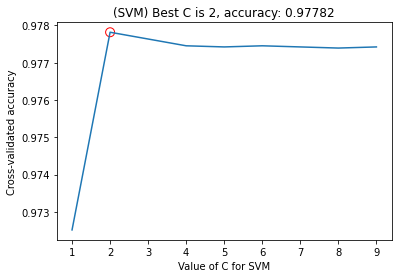

In [ ]:

# setting hyperparameters
k_range = range(1, 10)

# empty list to store scores
k_scores = []
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)

print('\nCross-Validation...\n')
t0 = time()

# 1. we will loop through reasonable values of k
for k in k_range:
    svm = SVC(kernel='linear', C=k, gamma='auto')
    scores = cross_val_score(svm, X_scale, y, cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())

    print("[%d] %0.4f (+/- %0.4f)" % (k, scores.mean(), scores.std() * 2) )


max_score = max(k_scores)
best_k = k_scores.index(max_score)+1

print("\nDone in %0.3fs" % (time() - t0))

print("\nBest C is %d, accuracy: %0.5f\n" % (best_k, max_score))


plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-validated accuracy')
plt.title("(SVM) Best C is %d, accuracy: %0.5f" % (best_k, max_score))
plt.scatter(best_k, max_score, s=80, facecolors='none', edgecolors='r')
plt.plot(k_range, k_scores)

In [ ]:
print(max_score)
print(k_scores)

0.9778181818181817
[0.9725151515151517, 0.9778181818181817, 0.9776363636363635, 0.9774545454545456, 0.9774242424242423, 0.9774545454545456, 0.9774242424242423, 0.9773939393939394, 0.9774242424242423]


In [ ]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
clf = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)
clf = clf.fit(X_train, Y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 71.454s
Best estimator found by grid search:
SVC(C=100000.0, class_weight='balanced', gamma=0.1)


Fitting the classifier to the training set


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


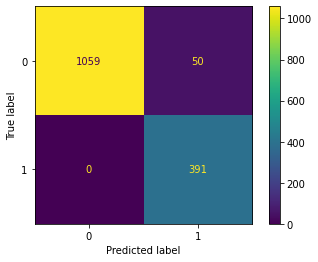

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


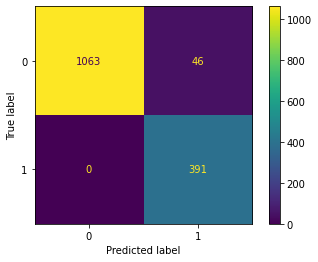

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


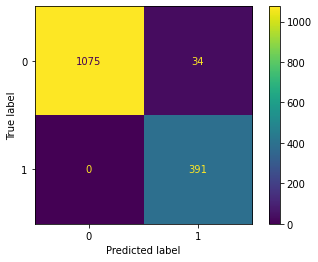

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


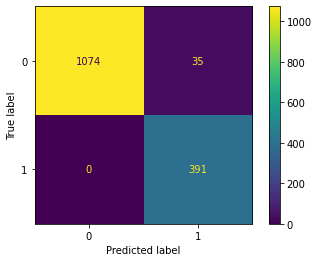

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


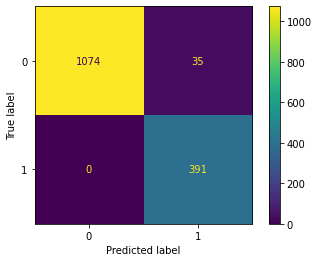

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


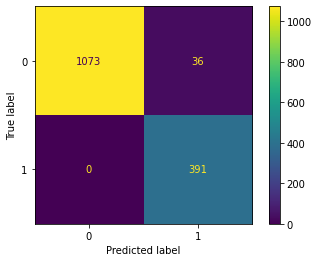

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


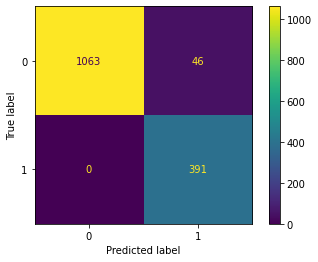

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


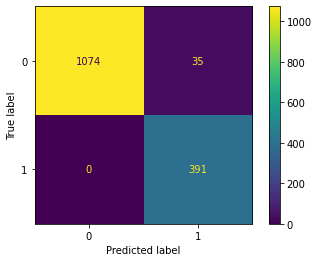

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


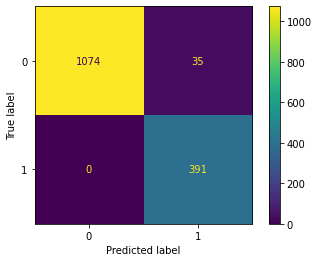

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


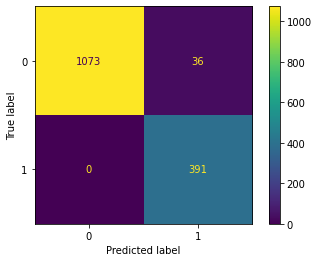

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


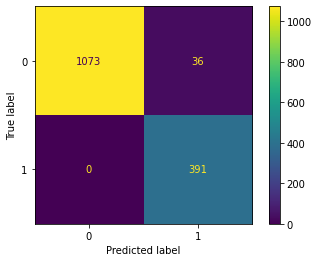

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


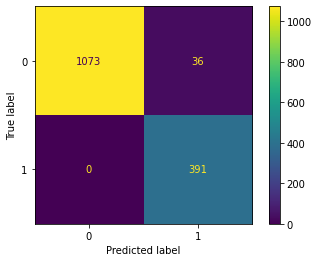

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


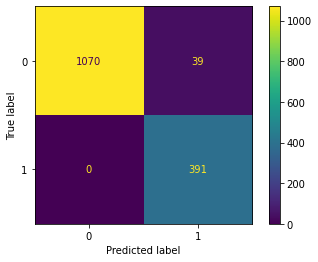

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


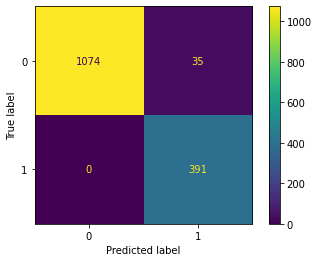

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


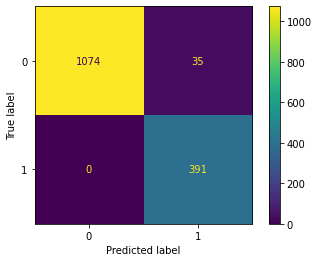

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


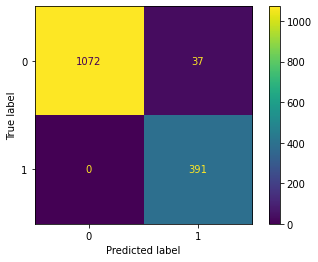

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


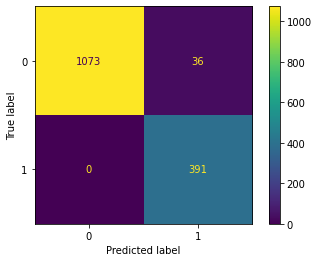

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


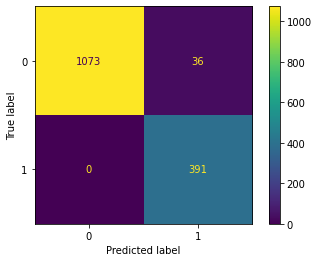

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


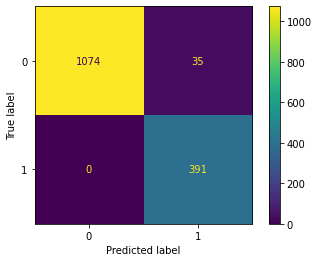

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


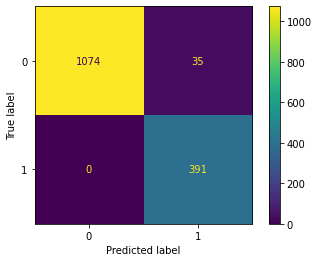

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


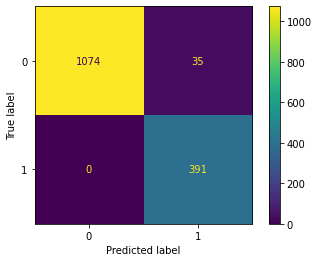

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


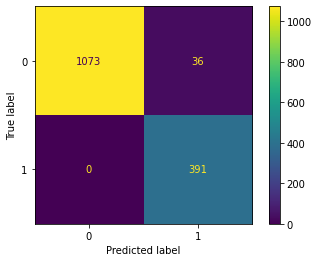

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


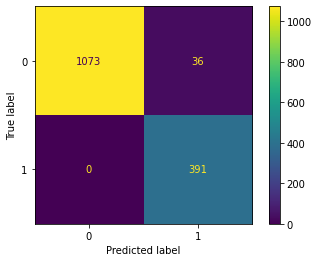

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


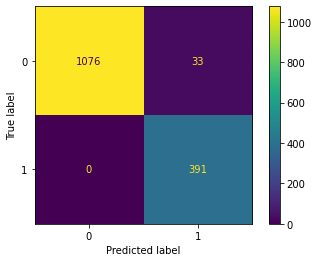

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


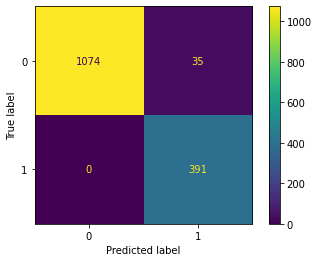

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


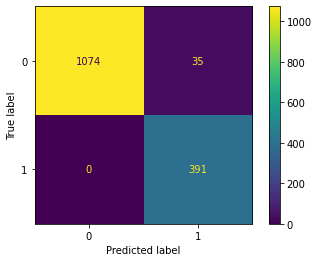

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


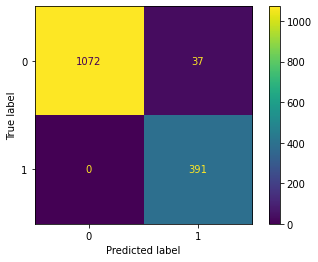

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


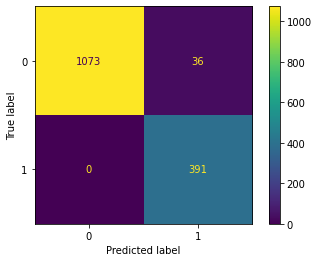

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


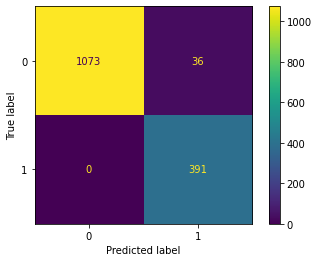

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


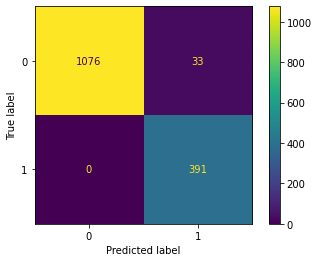

In [ ]:

print("Fitting the classifier to the training set")
t0 = time()
for i in [1e3, 5e3, 1e4, 5e4, 1e5]:
  for j in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]:
    clf = SVC(kernel="rbf", class_weight="balanced", C=i,gamma=j)
    clf = clf.fit(X_train, Y_train)
    plot_confusion_matrix(clf, X_test, Y_test)
    plt.show()

